In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [24]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:3]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0


## Quest_Review
### 분석 접근 방법 - 주차별/요일별 시각화 (시각화는 빨리 그려야함.)
        1) 표현하는 데이터 타입 
        2) 시작화 종류
            -단일변수 / 연속형: hist, (box (이상치))
            -단일변수/ 범주형: barplot
            -단일변수/ 순서형: line
        3) 현 데이터로 시각화 가능 여부
            - 한 graph에 동시 시각화 가능 여부_레코드 분리 되어 있어야함. 
            - 단일 변수 표현시 주의점 : count 대치하는 변수 여부
                    ⇒ 

In [25]:
## '입원일자', '퇴원일자', '환자ID'_필요한 변수만 추출
df_ROS_extract= df_ROS[['입원일자', '퇴원일자', '환자ID']]
df_ROS_extract[:2]

,입원일자,퇴원일자,환자ID
0,20190713,20190716,1PT
1,20190715,20190716,2PT


In [27]:
df_ROS_extract['입원_datetime']=pd.to_datetime(df_ROS_extract['입원일자'].astype(str))
df_ROS_extract['퇴원_datetime']=pd.to_datetime(df_ROS_extract['퇴원일자'].astype(str))

C:\Users\01-15\AppData\Local\Temp\ipykernel_6820\1452928883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_extract['입원_datetime']=pd.to_datetime(df_ROS_extract['입원일자'].astype(str))
C:\Users\01-15\AppData\Local\Temp\ipykernel_6820\1452928883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_extract['퇴원_datetime']=pd.to_datetime(df_ROS_extract['퇴원일자'].astype(str))


In [28]:
df_ROS_extract[:2]
df_ROS_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   입원일자         1894 non-null   int64         
 1   퇴원일자         1894 non-null   int64         
 2   환자ID         1894 non-null   object        
 3   입원_datetime  1894 non-null   datetime64[ns]
 4   퇴원_datetime  1894 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 74.1+ KB


#### 주별 환자 입원/퇴원 추이 시각화 및 인사이트
- 표현하는 데이터 타입: 연속형, 단일변수
- 시각화종류: lineplot

#### 요일별 환자 입원/퇴원 시각화 및 인사이트
- 표현하는 데이터 타입: 범주형, 단일변수
- 시각화종류: barplot
- 레코드 개수로 count = 월단위로 

In [29]:
df_ROS_extract['입원_datetime_day']=df_ROS_extract['입원_datetime'].dt.day_name()

C:\Users\01-15\AppData\Local\Temp\ipykernel_6820\3652748124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_extract['입원_datetime_day']=df_ROS_extract['입원_datetime'].dt.day_name()


In [30]:
df_ROS_extract['퇴원_datetime_day']=df_ROS_extract['퇴원_datetime'].dt.day_name()

C:\Users\01-15\AppData\Local\Temp\ipykernel_6820\2267483914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_extract['퇴원_datetime_day']=df_ROS_extract['퇴원_datetime'].dt.day_name()


In [31]:
df_ROS_extract

,입원일자,퇴원일자,환자ID,입원_datetime,퇴원_datetime,입원_datetime_day,퇴원_datetime_day
0,20190713,20190716,1PT,2019-07-13,2019-07-16,Saturday,Tuesday
1,20190715,20190716,2PT,2019-07-15,2019-07-16,Monday,Tuesday
2,20190729,20190801,3PT,2019-07-29,2019-08-01,Monday,Thursday
3,20190731,20190803,4PT,2019-07-31,2019-08-03,Wednesday,Saturday
4,20190903,20190907,5PT,2019-09-03,2019-09-07,Tuesday,Saturday
...,...,...,...,...,...,...,...
1889,20170407,20170408,1890PT,2017-04-07,2017-04-08,Friday,Saturday
1890,20170426,20170429,1891PT,2017-04-26,2017-04-29,Wednesday,Saturday
1891,20170410,20170412,1892PT,2017-04-10,2017-04-12,Monday,Wednesday
1892,20170408,20170411,1893PT,2017-04-08,2017-04-11,Saturday,Tuesday


In [36]:
## 이걸 레코드수로 count하면 되어서 index만 필요함. data=필요한것만.
pd.pivot_table(data=df_ROS_extract, index='입원_datetime_day', aggfunc=len)

,입원_datetime,입원일자,퇴원_datetime,퇴원_datetime_day,퇴원일자,환자ID
입원_datetime_day,,,,,,
Friday,204,204,204,204,204,204
Monday,329,329,329,329,329,329
Saturday,148,148,148,148,148,148
Sunday,204,204,204,204,204,204
Thursday,329,329,329,329,329,329
Tuesday,376,376,376,376,376,376
Wednesday,304,304,304,304,304,304


<Axes: xlabel='입원_datetime_day'>

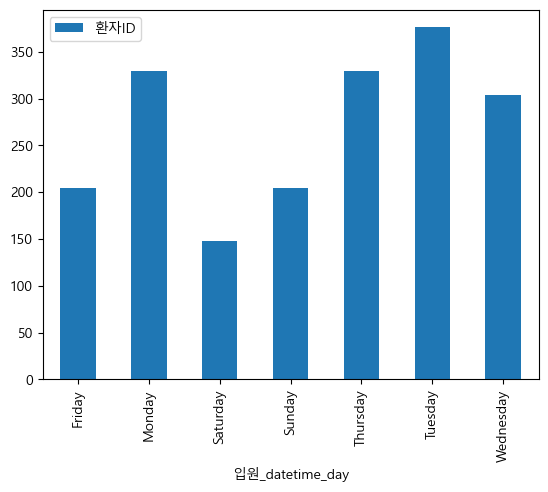

In [37]:
pd.pivot_table(data=df_ROS_extract[['입원_datetime_day', '환자ID']], index='입원_datetime_day', aggfunc=len).plot(kind='bar')

In [40]:
df_ROS_extract_pivot=pd.pivot_table(data=df_ROS_extract[['입원_datetime_day', '환자ID']], index='입원_datetime_day', aggfunc=len)
df_ROS_extract_pivot 


,환자ID
입원_datetime_day,
Friday,204
Monday,329
Saturday,148
Sunday,204
Thursday,329
Tuesday,376
Wednesday,304


In [43]:
#이걸 columns으로 바꿀 수 있음. DataFrame_index, columns, values 되어있는데 index를 떼서 columns으로 붙여줌. 
df_ROS_extract_pivot.index # series 형태이므로 columns으로 붙여준다. 

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='입원_datetime_day')

In [44]:
df_ROS_extract_pivot['입원일자_요일'] = df_ROS_extract_pivot.index

In [45]:
df_ROS_extract_pivot[:2]

,환자ID,입원일자_요일
입원_datetime_day,,
Friday,204,Friday
Monday,329,Monday


<Axes: xlabel='입원일자_요일', ylabel='환자ID'>

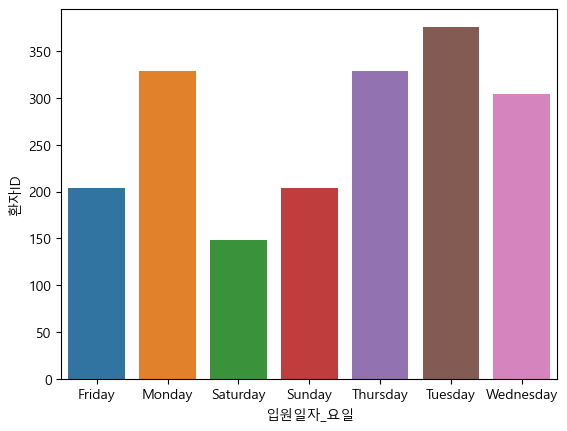

In [46]:
sns.barplot(data=df_ROS_extract_pivot, x='입원일자_요일', y='환자ID')

In [47]:
pd.pivot_table(data=df_ROS_extract, index='퇴원_datetime_day', aggfunc=len)

,입원_datetime,입원_datetime_day,입원일자,퇴원_datetime,퇴원일자,환자ID
퇴원_datetime_day,,,,,,
Friday,332,332,332,332,332,332
Monday,184,184,184,184,184,184
Saturday,301,301,301,301,301,301
Sunday,121,121,121,121,121,121
Thursday,329,329,329,329,329,329
Tuesday,279,279,279,279,279,279
Wednesday,348,348,348,348,348,348


<Axes: xlabel='퇴원_datetime_day'>

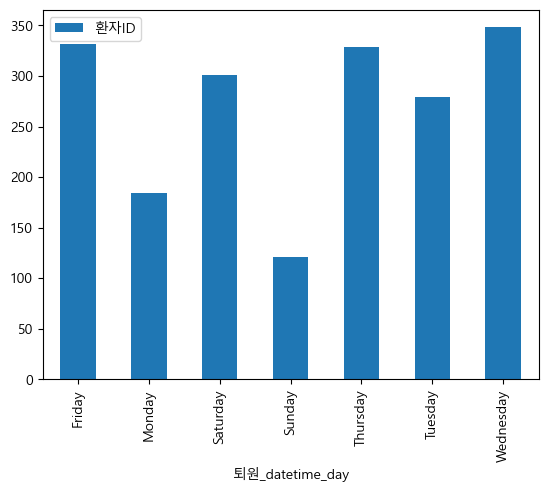

In [52]:
pd.pivot_table(data=df_ROS_extract[['퇴원_datetime_day', '환자ID']], index='퇴원_datetime_day', aggfunc=len).plot(kind='bar')

In [53]:
df_ROS_out_pivot=pd.pivot_table(data=df_ROS_extract[['퇴원_datetime_day', '환자ID']], index='퇴원_datetime_day', aggfunc=len)
df_ROS_out_pivot

,환자ID
퇴원_datetime_day,
Friday,332
Monday,184
Saturday,301
Sunday,121
Thursday,329
Tuesday,279
Wednesday,348


In [54]:
df_ROS_out_pivot['퇴원일자_요일']=df_ROS_out_pivot.index
df_ROS_out_pivot

,환자ID,퇴원일자_요일
퇴원_datetime_day,,
Friday,332,Friday
Monday,184,Monday
Saturday,301,Saturday
Sunday,121,Sunday
Thursday,329,Thursday
Tuesday,279,Tuesday
Wednesday,348,Wednesday
